## This year, some States just got hit by multiple strong hurricane such as Harvey and Irma. These Hurricane had left lots of impacts especially to the affected areas. Many buildings, cars, trees, houses were destroyed. Moreover, according to Condon and Sweet(2017), "about 80% of Hurricane Harvey victims do not have flood insurance," which made huge loss for the victims. Houses as one of the most valuable properties, perhaps, have the major impact. Therefore, to find out more about the impact, in this project, we would like to analyze the current market of housing price that was affected by the flood and compare it to the house in the nearby areas that was not flooded to see if there is any significant different.

## Properties Data would be collected from Zillow, which is one of the top real estate websites, in the United States. As Zillow provides several free API's that allows researchers to get data, any data scraping directly to the website is strictly prohibited. However, the data collection from API was very limited due to data protection and un-updated data. Therefore, for education purpose only, to get enough number of data to build a prototype study for homework (non commercial use), this project will use limited data scraping direct to the website which is strictly not recommended. 

# 1. Data Collection 

## Import packages 

In [1]:
import sys
import requests
from lxml import html
import csv
import pandas as pd
from pattern.en import sentiment
import time
from random import randint
from fake_useragent import UserAgent
from progressbar import ProgressBar
from bs4 import BeautifulSoup

## Try using Fake User Agent to get around (not recommended)

In [2]:
ua = UserAgent(fallback='Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36')

## Scraping 20 pages for houses that were affected by the flood

In [3]:
fromPage = 1
toPage = 20
zillow = []
city1 = "League-City-TX"
city2 = "Corpus-Christi-TX"
house1 = 0
house2 = 0

## Collect html address using beautiful soup for each city

In [4]:
pbar = ProgressBar()
for pageNo in pbar(range(fromPage, toPage + 1)):
    with requests.Session() as s:
        url = 'https://www.zillow.com/' + city1 + '/' + str(pageNo) + '_p'
        r = s.get(url, headers = {'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8','accept-encoding':'gzip, deflate, sdch, br','accept-language':'en-GB,en;q=0.8,en-US;q=0.6,ml;q=0.4','cache-control':'max-age=0','upgrade-insecure-requests':'1','user-agent':str(ua.random)})
    soup = BeautifulSoup(r.content, 'lxml')
    for a in soup.find_all('a', href=True):
        if a['href'][:5] == "/home" and a['href'][-6:] == "_zpid/":
            startPos = a['href'][:-6].rfind("/") + 1
            zillow.append(a['href'][:-6][startPos:])
house1 = len(zillow)

100% |########################################################################|


In [5]:
pbar = ProgressBar()
for pageNo in pbar(range(fromPage, toPage + 1)):
    with requests.Session() as s:
        url = 'https://www.zillow.com/' + city2 + '/' + str(pageNo) + '_p'
        r = s.get(url, headers = {'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8','accept-encoding':'gzip, deflate, sdch, br','accept-language':'en-GB,en;q=0.8,en-US;q=0.6,ml;q=0.4','cache-control':'max-age=0','upgrade-insecure-requests':'1','user-agent':str(ua.random)})
    soup = BeautifulSoup(r.content, 'lxml')
    for a in soup.find_all('a', href=True):
        if a['href'][:5] == "/home" and a['href'][-6:] == "_zpid/":
            startPos = a['href'][:-6].rfind("/") + 1
            zillow.append(a['href'][:-6][startPos:])
house2 = len(zillow) - house1

100% |########################################################################|


## Getting all the data needed: address, price, zillow estimate valuation, description, type of house, year build, heating system, cooling system, number of parking spot, lot sizes, how long it has been for sale(duration), price per sqft, number of people who save the house, sentiment analysis, zpid (zillow house id number), price cut and number of bed & baths.

In [6]:
maxTry = 5
l1   = [] #address 
l2   = [] #price
l3   = [] #estimate = zillow estimate valuation
l4   = [] #description
l50  = [] #type 
l51  = [] #year
l52  = [] #heat = heating system used
l53  = [] #cool = cooling system used
l54  = [] #park = number of parking spot
l55  = [] #lot = lots sizes
l56  = [] #duration = how long it has been for sale
l57  = [] #pricesqft = price per sqft
l58  = [] #save = how many people save the house
l6   = [] #score = toward negative or positive sentiment anaylsis
l7   = [] #relevance = relevance of the words within the sentence
l8   = [] #result = positive or negative sentiment analysis
l9   = [] #zpid = zillow house id
l10  = [] #cut = price cut since listed
l11  = [] #overview = number of bed, bath and sqft

## Start looping from the data list above

In [7]:
pbar = ProgressBar()
for currentHome in pbar(zillow):
    iTry = 0
    while True:
        if iTry < maxTry:
            with requests.Session() as s:
                url = 'https://www.zillow.com/homedetails/' + currentHome + '_zpid/?fullpage=true'
                r = s.get(url, headers = {'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8','accept-encoding':'gzip, deflate, sdch, br','accept-language':'en-GB,en;q=0.8,en-US;q=0.6,ml;q=0.4','cache-control':'max-age=0','upgrade-insecure-requests':'1','user-agent':str(ua.random)})
            soup = BeautifulSoup(r.content, 'lxml')
            if "function handleCaptcha" in soup.text:
                iTry = iTry + 1
            else:
                break
        else:
            print "Max try reached : " + url
            break

    if iTry < maxTry:
        taddress = soup.find("h1", {"class": "notranslate"})
        l1.append(taddress.text.strip())
                
        toverview = taddress.find_next("h3", {"class": ""})
        l11.append(toverview.text.strip())

        for testimates in soup.find_all('div', {'class' : 'estimates'}):
            
            tprice = testimates.find_all("div", {"class": "main-row home-summary-row"})
            if len(tprice) == 1:
                for tvalue in tprice:
                    l2.append(tvalue.text.strip())
            else:
                if len(tprice) == 0:
                    l2.append("Not found")
                else:
                    l2.append("NA")
                    
            tcut = testimates.find_all("div", {"class": "price-cut-row home-summary-row"})
            if len(tcut) == 1:
                for tvalue in tcut:
                    l10.append(tvalue.text.strip())
            else:
                if len(tcut) == 0:
                    l10.append("Not found")
                else:
                    l10.append("NA")
                    
            tsummary = testimates.find_all("div", {"class": " home-summary-row"})
            if len(tsummary) == 1:
                strSummary = ""
                for tvalue in tsummary:
                    startPos = tvalue.text.rfind(":") + 1
                    strSummary = strSummary + " " + tvalue.text[startPos:].strip()
                l3.append(strSummary)
            else:
                if len(tsummary) == 0:
                    l3.append("Not found")
                elif len(tsummary) == 2:
                    for tvalue in tsummary:
                        if tvalue.text[:12] == " Foreclosure":
                            startPos = tvalue.text.rfind(":") + 1
                            l2[-1] = tvalue.text[startPos:].strip()
                        elif tvalue.text[:6] == " Below":
                            startPos = tvalue.text.rfind(":") + 1
                            l3.append(tvalue.text[startPos:].strip())

        for tdescription in soup.find_all('div', {'class' : 'notranslate zsg-content-item'}):
            if len(tdescription) > 0:
                strText = tdescription.text
                tmore = tdescription.find_all('div')
                for tvalue in tmore:
                    strText = strText + " " + tvalue.text
                l4.append(strText)
            else:
                strText = ""
                l4.append("Not found")

        tpoint = soup.find_all("div", {"class": "hdp-fact-ataglance-value"})
        if len(tpoint) > 0:
            for ibullet in range(9):
                if ibullet < len(tpoint):
                    globals()['l5' + str(ibullet)].append(tpoint[ibullet].text)
                else:
                    globals()['l5' + str(ibullet)].append("Not found")
        else:
            l50.append("NA")
            l51.append("NA")
            l52.append("NA")
            l53.append("NA")
            l54.append("NA")
            l55.append("NA")
            l56.append("NA")
            l57.append("NA")
            l58.append("NA")

        score = sentiment(strText)
        l6.append(score[0])
        l7.append(score[1])
        if score[0] > 0:
            l8.append("positive")
        elif score[0] == 0:
            l8.append("neutral")
        else:
            l8.append("negative")
        l9.append(currentHome)

100% |########################################################################|


## Saving data to csv

In [8]:
if len(l1) > 0:
    property = zip(l1,l2,l3,l4,l50,l51,l52,l53,l54,l55,l56,l57,l58,l6,l7,l8,l9,l10,l11)
    property = pd.DataFrame(property)
    property = property.rename(columns={0: 'address', 1: 'price', 2: 'estimate', 3: 'description', 4: 'type', 5: 'year', 6: 'heat', 7: 'cool', 8: 'park', 9: 'lot', 10: 'duration', 11: 'pricesqft', 12: 'save', 13: 'score', 14: 'relevance', 15: 'result', 16: 'zpid', 17: 'cut', 18: 'overview'})
    property.to_csv("output_house.csv", encoding='utf-8')

# 2. Data Processing

## Importing packages

In [1]:
import pandas as pd
import re
#Visualization packages
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn import linear_model

## Importing DataSet

In [2]:
#Import datasets
df_fl=pd.read_csv('output_house.csv') #Flooded Dataset
df_nfl=pd.read_csv('02 Alamo Height Dallas San Antonio.csv') # Not Flooded Dataset

## Data Cleaning and Processing

In [3]:
df_fl['flood']=1.0 #Addidng a column to indicate the dataset
df_nfl['flood']=0.0 #Addidng a column to indicate the dataset
df = df_fl.append(df_nfl) #combining two datasets
df['zipcode']=df['address'].str[-5:] #Extracting only zipcode from the address
df=df.drop(['Unnamed: 0','heat','cool','address','zpid'],axis=1) # Dropping unwanted columns
df['duration']=df['duration'].str.replace(' Days','') # Data Cleaning
df['price']=df['price'].str.replace('$','') # Data Cleaning
df['price']=df['price'].str.replace(',','') # Data Cleaning
df['estimate']=df['estimate'].str.replace('$','') # Data Cleaning
df['estimate']=df['estimate'].str.replace(',','') # Data Cleaning
df['pricesqft']=df['pricesqft'].str.replace('$','') # Data Cleaning
df['pricesqft']=df['pricesqft'].str.replace(',','') # Data Cleaning

In [4]:
df['duration']=df['duration'].str.replace('1 Day','1') #Replacing strings with integer values
df['duration']=df['duration'].str.replace('Less than 1 day','0') #Replacing strings with integer values
df['result']=df['result'].str.replace('neutral','0') #Replacing strings with integer values
df['result']=df['result'].str.replace('positive','1') #Replacing strings with integer values
df['result']=df['result'].str.replace('negative','-1') #Replacing strings with integer values
df['type']=df['type'].str.replace('Condo','0') #Replacing strings with integer values
df['type']=df['type'].str.replace('Mobile / Manufactured','1') #Replacing strings with integer values
df['type']=df['type'].str.replace('Multi Family','2') #Replacing strings with integer values
df['type']=df['type'].str.replace('Single Family','3') #Replacing strings with integer values
df['type']=df['type'].str.replace('Townhouse','4') #Replacing strings with integer values
df['park']=df['park'].str.replace('spaces','') # Data Cleaning
df['park']=df['park'].str.replace('space','') # Data Cleaning
df['park']=df['park'].str.replace('No Data','0') #Replacing strings with integer values
df['park']=df['park'].str.replace('None','0') #Replacing strings with integer values
df['park']=df['park'].str.replace('On street, Attached Garage','0') #Replacing strings with integer values
df['park']=df['park'].str.replace('Carport, Detached Garage','0') #Replacing strings with integer values
df['park']=df['park'].str.replace('Off street, Attached Garage','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('Attached Garage','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('Detached Garage','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('Carport','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('Carport, Attached Garage','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('Off street','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('On street, 1','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('Garage','1') #Replacing strings with integer values
df['park']=df['park'].str.replace('1, 1','1') #Replacing strings with integer values
df=df[pd.to_numeric(df['park'], errors='coerce').notnull()] #Dropping rows with only characters
df['type']=df['type'].str.replace('Townhouse','4') #Replacing strings with integer values
df=df[df['lot'].str.contains("sqft|acres")==True] #Dropping rows that does not have sqft or acres in the lot column!
df['lot']=df['lot'].str.replace(',','') # Data Cleaning
df['lot']=df['lot'].str.replace('sqft','') # Data Cleaning
df['lot']=df['lot'].str.replace('acres','') # Data Cleaning
df['cut']=df['cut'].str.replace('Price cut: ','') # Data Cleaning
df['cut']=df['cut'].str.replace(',','') # Data Cleaning
df['cut']=df['cut'].str.replace('$','') # Data Cleaning

In [5]:
df.head() #Checking the first five rows of data

,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,cut,overview,flood,zipcode
0,290000,301445,LOVELY PERRY HOME LOCATED BEHIND THE GATES IN ...,3,1988,1,9221,4,86,17,0.177037,0.535926,1,Not found,"3 beds 3 baths 3,368 sqft",1.0,77573
1,699000,723202,Live every day at your own private resort!This...,3,2006,8,1.12,21,148,63,0.213185,0.506393,1,Not found,"5 beds 5 baths 4,725 sqft",1.0,77573
2,315000,298669,No flooding! Great curb appeal & no back neigh...,3,2004,0,7200,24,107,22,0.380000,0.450000,1,Not found,"4 beds 4 baths 2,940 sqft",1.0,77573
3,325500,318612,GORGEOUS HOME IN DESIRABLE WESTOVER PARK! YOU'...,3,2013,0,8624,26,126,20,0.144742,0.407540,1,Not found,"3 beds 2 baths 2,577 sqft",1.0,77573
4,194900,195319,DID NOT FLOOD DURING HARVEY!! Gorgeous 3/2/2 ...,3,2004,2,5405,59,122,48,0.399935,0.650773,1,-5000 (11/27),"3 beds 2 baths 1,602 sqft",1.0,77539


In [6]:
df.info() #Extracting the datatypes and checking for nulls!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1353
Data columns (total 17 columns):
price          1605 non-null object
estimate       1605 non-null object
description    1605 non-null object
type           1605 non-null object
year           1605 non-null object
park           1605 non-null object
lot            1605 non-null object
duration       1605 non-null object
pricesqft      1605 non-null object
save           1605 non-null object
score          1605 non-null float64
relevance      1605 non-null float64
result         1605 non-null object
cut            1605 non-null object
overview       1605 non-null object
flood          1605 non-null float64
zipcode        1605 non-null object
dtypes: float64(3), object(14)
memory usage: 225.7+ KB


In [7]:
df=df[pd.to_numeric(df['price'], errors='coerce').notnull()] #Dropping rows with only characters
df=df[pd.to_numeric(df['estimate'], errors='coerce').notnull()] #Dropping rows with only characters
df=df[pd.to_numeric(df['save'], errors='coerce').notnull()] #Dropping rows with only characters
df=df[pd.to_numeric(df['year'], errors='coerce').notnull()] #Dropping rows with only characters
df=df[pd.to_numeric(df['pricesqft'], errors='coerce').notnull()] #Dropping rows with only characters
df=df[pd.to_numeric(df['zipcode'], errors='coerce').notnull()] #Dropping rows with only characters
df['price'] = df['price'].astype(int) #Converting the datatype from object to digits!
df['estimate'] = df['estimate'].astype(int) #Converting the datatype from object to digits!
df['type'] = df['type'].astype(int) #Converting the datatype from object to digits!
df['year'] = df['year'].astype(int) #Converting the datatype from object to digits!
df['park'] = df['park'].astype(int) #Converting the datatype from object to digits!
df['duration'] = df['duration'].astype(int) #Converting the datatype from object to digits!
df['pricesqft'] = df['pricesqft'].astype(int) #Converting the datatype from object to digits!
df['save'] = df['save'].astype(int) #Converting the datatype from object to digits!
df['result'] = df['result'].astype(int) #Converting the datatype from object to digits!
df['zipcode'] = df['zipcode'].astype(int) #Converting the datatype from object to digits!
df['lot'] = df['lot'].astype(float) #Converting the datatype from object to digits!

In [8]:
df.info() #Extracting the datatypes and checking for nulls!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1353
Data columns (total 17 columns):
price          1045 non-null int32
estimate       1045 non-null int32
description    1045 non-null object
type           1045 non-null int32
year           1045 non-null int32
park           1045 non-null int32
lot            1045 non-null float64
duration       1045 non-null int32
pricesqft      1045 non-null int32
save           1045 non-null int32
score          1045 non-null float64
relevance      1045 non-null float64
result         1045 non-null int32
cut            1045 non-null object
overview       1045 non-null object
flood          1045 non-null float64
zipcode        1045 non-null int32
dtypes: float64(4), int32(10), object(3)
memory usage: 106.1+ KB


In [9]:
df=df.reset_index() #Reseting the dataset index!
df=df.drop(['index'], axis=1) #Dropping the index column
df.head() #Checking the first five rows of data

,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,cut,overview,flood,zipcode
0,290000,301445,LOVELY PERRY HOME LOCATED BEHIND THE GATES IN ...,3,1988,1,9221.00,4,86,17,0.177037,0.535926,1,Not found,"3 beds 3 baths 3,368 sqft",1.0,77573
1,699000,723202,Live every day at your own private resort!This...,3,2006,8,1.12,21,148,63,0.213185,0.506393,1,Not found,"5 beds 5 baths 4,725 sqft",1.0,77573
2,315000,298669,No flooding! Great curb appeal & no back neigh...,3,2004,0,7200.00,24,107,22,0.380000,0.450000,1,Not found,"4 beds 4 baths 2,940 sqft",1.0,77573
3,325500,318612,GORGEOUS HOME IN DESIRABLE WESTOVER PARK! YOU'...,3,2013,0,8624.00,26,126,20,0.144742,0.407540,1,Not found,"3 beds 2 baths 2,577 sqft",1.0,77573
4,194900,195319,DID NOT FLOOD DURING HARVEY!! Gorgeous 3/2/2 ...,3,2004,2,5405.00,59,122,48,0.399935,0.650773,1,-5000 (11/27),"3 beds 2 baths 1,602 sqft",1.0,77539


In [10]:
indx=df.index[df['lot']<10] #Extracting the index of rows where lot is smaller than 10
#Converting acres to sqft
for i in indx:
    df['lot'][i]=df['lot'][i]*43560
df.head() #Checking the first five rows of data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,cut,overview,flood,zipcode
0,290000,301445,LOVELY PERRY HOME LOCATED BEHIND THE GATES IN ...,3,1988,1,9221.0,4,86,17,0.177037,0.535926,1,Not found,"3 beds 3 baths 3,368 sqft",1.0,77573
1,699000,723202,Live every day at your own private resort!This...,3,2006,8,48787.2,21,148,63,0.213185,0.506393,1,Not found,"5 beds 5 baths 4,725 sqft",1.0,77573
2,315000,298669,No flooding! Great curb appeal & no back neigh...,3,2004,0,7200.0,24,107,22,0.380000,0.450000,1,Not found,"4 beds 4 baths 2,940 sqft",1.0,77573
3,325500,318612,GORGEOUS HOME IN DESIRABLE WESTOVER PARK! YOU'...,3,2013,0,8624.0,26,126,20,0.144742,0.407540,1,Not found,"3 beds 2 baths 2,577 sqft",1.0,77573
4,194900,195319,DID NOT FLOOD DURING HARVEY!! Gorgeous 3/2/2 ...,3,2004,2,5405.0,59,122,48,0.399935,0.650773,1,-5000 (11/27),"3 beds 2 baths 1,602 sqft",1.0,77539


In [11]:
df['bed']=0.0 #Defining new columnf for number of bedrooms
df['bath']=0.0 #Defining new columnf for number of bathrooms
#Extracting number of bedrooms and bathrooms and saving into new defined columns
for i in range(0,len(df)):
    df.bed[i] = re.findall('\d+', str(df['overview'][i]))[0]
    df.bath[i] = re.findall('\d+', str(df['overview'][i]))[1]
df=df.drop(['overview'], axis=1) #Dropping the original column
df.head() #Checking the first five rows of data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,cut,flood,zipcode,bed,bath
0,290000,301445,LOVELY PERRY HOME LOCATED BEHIND THE GATES IN ...,3,1988,1,9221.0,4,86,17,0.177037,0.535926,1,Not found,1.0,77573,3.0,3.0
1,699000,723202,Live every day at your own private resort!This...,3,2006,8,48787.2,21,148,63,0.213185,0.506393,1,Not found,1.0,77573,5.0,5.0
2,315000,298669,No flooding! Great curb appeal & no back neigh...,3,2004,0,7200.0,24,107,22,0.380000,0.450000,1,Not found,1.0,77573,4.0,4.0
3,325500,318612,GORGEOUS HOME IN DESIRABLE WESTOVER PARK! YOU'...,3,2013,0,8624.0,26,126,20,0.144742,0.407540,1,Not found,1.0,77573,3.0,2.0
4,194900,195319,DID NOT FLOOD DURING HARVEY!! Gorgeous 3/2/2 ...,3,2004,2,5405.0,59,122,48,0.399935,0.650773,1,-5000 (11/27),1.0,77539,3.0,2.0


In [12]:
df['Cut']=0.0 #Making new column to extract the amount of price cut
# Extracting the amount of price cut and save into new defined column
for i in range(0,len(df)):
    if len(re.findall('\d+', str(df['cut'][i]))) > 0:
        df.Cut[i] = re.findall('\d+', str(df['cut'][i]))[0]
df=df.drop(['cut'], axis=1) #Dropping the original column
df.head() #Checking the first five rows of data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,flood,zipcode,bed,bath,Cut
0,290000,301445,LOVELY PERRY HOME LOCATED BEHIND THE GATES IN ...,3,1988,1,9221.0,4,86,17,0.177037,0.535926,1,1.0,77573,3.0,3.0,0.0
1,699000,723202,Live every day at your own private resort!This...,3,2006,8,48787.2,21,148,63,0.213185,0.506393,1,1.0,77573,5.0,5.0,0.0
2,315000,298669,No flooding! Great curb appeal & no back neigh...,3,2004,0,7200.0,24,107,22,0.380000,0.450000,1,1.0,77573,4.0,4.0,0.0
3,325500,318612,GORGEOUS HOME IN DESIRABLE WESTOVER PARK! YOU'...,3,2013,0,8624.0,26,126,20,0.144742,0.407540,1,1.0,77573,3.0,2.0,0.0
4,194900,195319,DID NOT FLOOD DURING HARVEY!! Gorgeous 3/2/2 ...,3,2004,2,5405.0,59,122,48,0.399935,0.650773,1,1.0,77539,3.0,2.0,5000.0


In [13]:
df.info() #Extracting the datatypes and checking for nulls!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 18 columns):
price          1045 non-null int32
estimate       1045 non-null int32
description    1045 non-null object
type           1045 non-null int32
year           1045 non-null int32
park           1045 non-null int32
lot            1045 non-null float64
duration       1045 non-null int32
pricesqft      1045 non-null int32
save           1045 non-null int32
score          1045 non-null float64
relevance      1045 non-null float64
result         1045 non-null int32
flood          1045 non-null float64
zipcode        1045 non-null int32
bed            1045 non-null float64
bath           1045 non-null float64
Cut            1045 non-null float64
dtypes: float64(7), int32(10), object(1)
memory usage: 106.2+ KB


## Data Visualization

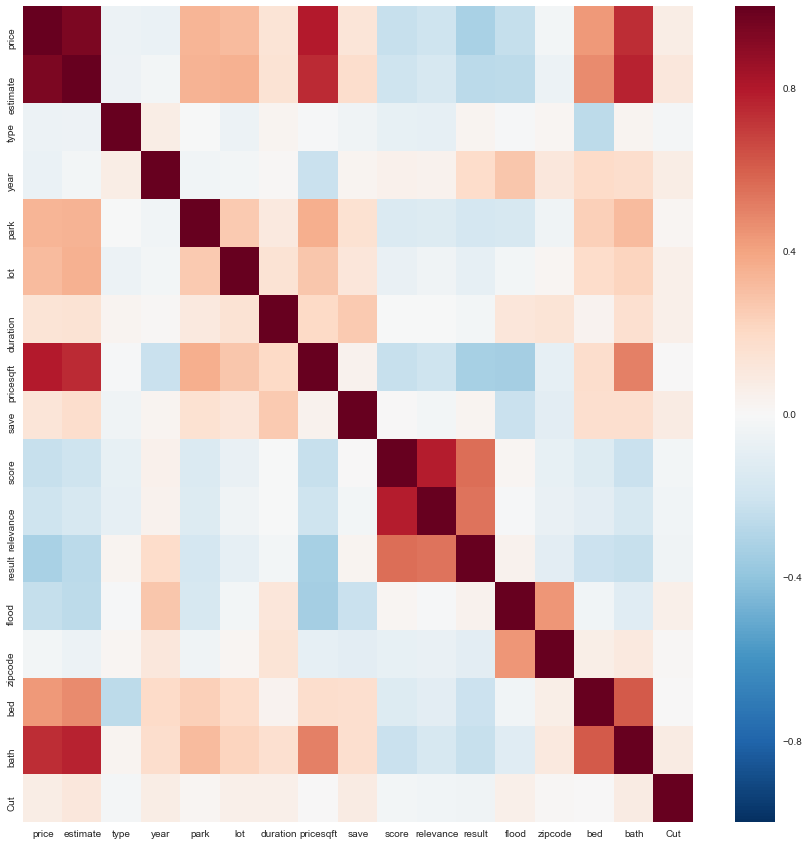

In [14]:
df_digits=df.drop(['description'], axis=1) #Defining new dataset that does not contain description
# Heatmap of data correlation
plt.figure(figsize=(15,15))
sns.heatmap(df_digits.corr())

In [15]:
df_digits.corr() #Data Correlation

,price,estimate,type,year,park,lot,duration,pricesqft,save,score,relevance,result,flood,zipcode,bed,bath,Cut
price,1.000000,0.939970,-0.055436,-0.068361,0.338651,0.314404,0.138085,0.791187,0.129788,-0.231442,-0.203871,-0.322817,-0.234904,-0.027667,0.435400,0.739173,0.075481
estimate,0.939970,1.000000,-0.050605,-0.025307,0.346019,0.359081,0.147440,0.748252,0.178705,-0.207679,-0.166772,-0.267625,-0.260660,-0.055076,0.475347,0.768945,0.116320
type,-0.055436,-0.050605,1.000000,0.076476,-0.003574,-0.058306,0.026814,-0.011250,-0.044982,-0.079043,-0.091381,0.030833,-0.007959,0.018751,-0.265607,0.025648,-0.023390
year,-0.068361,-0.025307,0.076476,1.000000,-0.037214,-0.025909,0.010459,-0.221453,0.026576,0.050788,0.042394,0.185160,0.280548,0.113156,0.189648,0.174820,0.074286
park,0.338651,0.346019,-0.003574,-0.037214,1.000000,0.264602,0.095130,0.362885,0.153833,-0.147126,-0.134691,-0.178510,-0.170865,-0.041541,0.236526,0.314533,0.021122
lot,0.314404,0.359081,-0.058306,-0.025909,0.264602,1.000000,0.144175,0.276749,0.124462,-0.077377,-0.040423,-0.088804,-0.030505,0.018807,0.185131,0.220416,0.059703
duration,0.138085,0.147440,0.026814,0.010459,0.095130,0.144175,1.000000,0.200594,0.261659,-0.004174,-0.006325,-0.026366,0.118666,0.139439,0.035896,0.157315,0.058150
pricesqft,0.791187,0.748252,-0.011250,-0.221453,0.362885,0.276749,0.200594,1.000000,0.044415,-0.233836,-0.205137,-0.334451,-0.341032,-0.091913,0.174862,0.503965,0.007095
save,0.129788,0.178705,-0.044982,0.026576,0.153833,0.124462,0.261659,0.044415,1.000000,0.007212,-0.023447,0.027978,-0.221153,-0.107875,0.166157,0.168086,0.084925
score,-0.231442,-0.207679,-0.079043,0.050788,-0.147126,-0.077377,-0.004174,-0.233836,0.007212,1.000000,0.788291,0.561314,0.020443,-0.082153,-0.136984,-0.222454,-0.027595


In [16]:
df_digits.groupby('flood').mean() #Pivot table for flooded and not flooded properties

,price,estimate,type,year,park,lot,duration,pricesqft,save,score,relevance,result,zipcode,bed,bath,Cut
flood,,,,,,,,,,,,,,,,
0.0,576960.116638,480961.147513,3.060034,1976.053173,1.360206,10948.066552,57.619211,192.408233,60.468268,0.251332,0.501634,0.857633,76877.951973,3.559177,3.056604,1985.595197
1.0,316359.190476,293691.792208,3.056277,1992.794372,0.954545,10143.491342,91.573593,124.404762,27.818182,0.257487,0.498562,0.898268,78005.463203,3.495671,2.753247,4015.497835


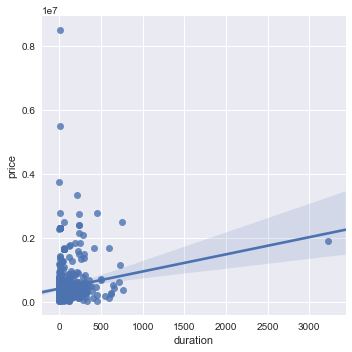

In [17]:
sns.lmplot("duration", "price",df_digits ) #Checking relation of price, and duration

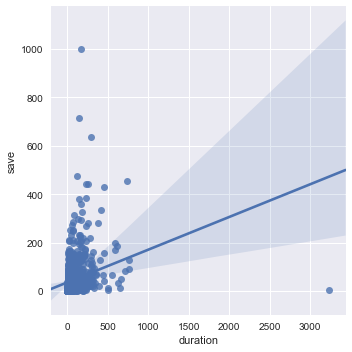

In [18]:
sns.lmplot("duration", "save",df_digits ) #Checking relation of save, and duration

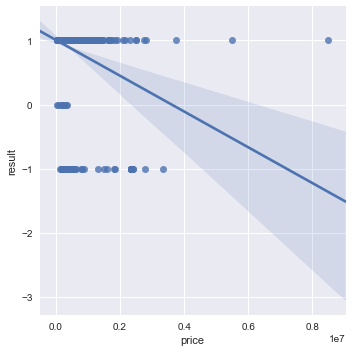

In [19]:
sns.lmplot("price", "result",df_digits ) #Checking relation of result, and price

## Results

 Flooded area houses are by average younger which means even new houses are for sale! Which is not the case in not flooded area!(92 vs 76)
 
 Flooded area houses have faced much more price cut! (4000 vs 2000)
 
 People did not save that much houses from flooded areas! (60 vs 27)
 
 People have tried to write as much as positive as possible for the flooded area houses!
 
 Interestingly when the price is high, people did not tried that much to write positively! (The negative correlation of price and result!)
 
 And finally flooded area houses are cheaper! (We have seen that ZipCode didn't affect the price that much!)

## Regression Models

In [20]:
X = df_digits.drop(['estimate', 'price', 'pricesqft'],axis=1) # The other two parameters are having very high correlation with the y
y = df_digits['estimate'] 

In [21]:
# Regression model with selected parameters
model1 = lm.LinearRegression() # Defining the model
model1.fit(X, y) # Fitting x and y
model1_y = model1.predict(X) # Defining a series for predicted values
#Model coefficients, intercept, mean square error (MSE), variance score (or R-square)
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

Coefficients:  [ -8.30110607e+04  -1.09520220e+03   1.17216536e+04   4.77212003e+00
   7.65088713e+01  -5.52012115e+01   4.88227013e+04  -6.69151186e+04
  -4.47722962e+04  -7.89374196e+04  -2.15897364e+01  -7.18268393e+03
   2.08455239e+05   1.14376061e+00]
y-intercept  3935493.26361
mean square error:  40298055812.9
variance or r-squared:  0.683465896132


In [22]:
# making a model with Lasso model
model2 = linear_model.Lasso(alpha=1) # Defining the model
model2.fit(X, y) # Fitting x and y
model2_y = model2.predict(X) # Defining a series for predicted values
#Model coefficients, intercept, mean square error (MSE), variance score (or R-square)
print 'Coefficients: ', model2.coef_
print "y-intercept ", model2.intercept_
print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

Coefficients:  [ -8.29832345e+04  -1.09527436e+03   1.17214901e+04   4.77206004e+00
   7.65077754e+01  -5.51731458e+01   4.85881754e+04  -6.66663415e+04
  -4.47651761e+04  -7.89290335e+04  -2.15907689e+01  -7.17529518e+03
   2.08450975e+05   1.14379909e+00]
y-intercept  3935542.22898
mean square error:  40298056351.3
variance or r-squared:  0.683465891904


In [23]:
#Making regression model with f_regression (feature selection)
X_new = SelectKBest(f_regression, k=4).fit_transform(X, y) # Selecting only 4 parameters!
model3 = lm.LinearRegression() # Defining the model
model3.fit(X_new, y) # Fitting x and y
model3_y = model3.predict(X_new) # Defining a series for predicted values
#Model mean square error (MSE), variance score (or R-square)
print "mean square error: ", mean_squared_error(y, model3_y)
print "variance or r-squared: ", explained_variance_score(y, model3_y)

mean square error:  46574316651.5
variance or r-squared:  0.634166976864


In [24]:
# Selecting best parameters using recursive feature selection (feature selection)
lr = lm.LinearRegression() # Defining the model
rfe = RFE(lr, n_features_to_select=2) # Extracting the best two features
rfe_y = rfe.fit(X,y) # Fitting x and y
#Model mean square error (MSE), variance score (or R-square)
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'bath'), (1, 'flood'), (2, 'type'), (3, 'result'), (4, 'relevance'), (5, 'score'), (6, 'park'), (7, 'bed'), (8, 'year'), (9, 'duration'), (10, 'zipcode'), (11, 'save'), (12, 'lot'), (13, 'Cut')]


In [25]:
# Making a model with only two best selected parameters by RFE
X_recursive=df_digits[['bath', 'flood']] # Defining new X with only two parameters
model4 = lm.LinearRegression() # Defining the model
model4.fit(X_recursive, y) # Fitting x and y
model4_y = model4.predict(X_recursive) # Defining a series for predicted values
#Model mean square error (MSE), variance score (or R-square)
print "mean square error: ", mean_squared_error(y, model4_y)
print "variance or r-squared: ", explained_variance_score(y, model4_y)

mean square error:  48453120418.1
variance or r-squared:  0.619409305443


### So, here we see that two parameters as "number of bathrooms" and "flood indicator", are capable to make the prediction model as good as a model with all the parameters!

## Testing on new dataset

### Importing testing dataset

In [26]:
df_fl_fl=pd.read_csv('03 Jacksonville.csv') #Flooded Dataset from a city in Florida

### Data Cleaning Process

In [27]:
df_fl_fl['flood']=1.0 #Addidng a column to indicate the dataset
df_fl_fl['zipcode']=df_fl_fl['address'].str[-5:] #Extracting only zipcode from the address
df_fl_fl=df_fl_fl.drop(['Unnamed: 0','heat','cool','address','zpid'],axis=1) # Dropping unwanted columns
df_fl_fl['duration']=df_fl_fl['duration'].str.replace(' Days','') # Data Cleaning
df_fl_fl['price']=df_fl_fl['price'].str.replace('$','') # Data Cleaning
df_fl_fl['price']=df_fl_fl['price'].str.replace(',','') # Data Cleaning
df_fl_fl['estimate']=df_fl_fl['estimate'].str.replace('$','') # Data Cleaning
df_fl_fl['estimate']=df_fl_fl['estimate'].str.replace(',','') # Data Cleaning
df_fl_fl['pricesqft']=df_fl_fl['pricesqft'].str.replace('$','') # Data Cleaning
df_fl_fl['pricesqft']=df_fl_fl['pricesqft'].str.replace(',','') # Data Cleaning
df_fl_fl['duration']=df_fl_fl['duration'].str.replace('1 Day','1') #Replacing strings with integer values
df_fl_fl['duration']=df_fl_fl['duration'].str.replace('Less than 1 day','0') #Replacing strings with integer values
df_fl_fl['result']=df_fl_fl['result'].str.replace('neutral','0') #Replacing strings with integer values
df_fl_fl['result']=df_fl_fl['result'].str.replace('positive','1') #Replacing strings with integer values
df_fl_fl['result']=df_fl_fl['result'].str.replace('negative','-1') #Replacing strings with integer values
df_fl_fl['type']=df_fl_fl['type'].str.replace('Condo','0') #Replacing strings with integer values
df_fl_fl['type']=df_fl_fl['type'].str.replace('Mobile / Manufactured','1') #Replacing strings with integer values
df_fl_fl['type']=df_fl_fl['type'].str.replace('Multi Family','2') #Replacing strings with integer values
df_fl_fl['type']=df_fl_fl['type'].str.replace('Single Family','3') #Replacing strings with integer values
df_fl_fl['type']=df_fl_fl['type'].str.replace('Townhouse','4') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('spaces','') # Data Cleaning
df_fl_fl['park']=df_fl_fl['park'].str.replace('space','') # Data Cleaning
df_fl_fl['park']=df_fl_fl['park'].str.replace('No Data','0') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('None','0') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('On street, Attached Garage','0') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Carport, Detached Garage','0') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Off street, Attached Garage','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Attached Garage','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Detached Garage','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Carport','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Carport, Attached Garage','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Off street','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('On street, 1','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('Garage','1') #Replacing strings with integer values
df_fl_fl['park']=df_fl_fl['park'].str.replace('1, 1','1') #Replacing strings with integer values
df_fl_fl=df_fl_fl[pd.to_numeric(df_fl_fl['park'], errors='coerce').notnull()] #Dropping rows with only characters
df_fl_fl['type']=df_fl_fl['type'].str.replace('Townhouse','4') #Replacing strings with integer values
df_fl_fl=df_fl_fl[df_fl_fl['lot'].str.contains("sqft|acres")==True] #Dropping rows that does not have sqft or acres in the lot column!
df_fl_fl['lot']=df_fl_fl['lot'].str.replace(',','') # Data Cleaning
df_fl_fl['lot']=df_fl_fl['lot'].str.replace('sqft','') # Data Cleaning
df_fl_fl['lot']=df_fl_fl['lot'].str.replace('acres','') # Data Cleaning
df_fl_fl['cut']=df_fl_fl['cut'].str.replace('Price cut: ','') # Data Cleaning
df_fl_fl['cut']=df_fl_fl['cut'].str.replace(',','') # Data Cleaning
df_fl_fl['cut']=df_fl_fl['cut'].str.replace('$','') # Data Cleaning
df_fl_fl=df_fl_fl[pd.to_numeric(df_fl_fl['price'], errors='coerce').notnull()] #Dropping rows with only characters
df_fl_fl=df_fl_fl[pd.to_numeric(df_fl_fl['estimate'], errors='coerce').notnull()] #Dropping rows with only characters
df_fl_fl=df_fl_fl[pd.to_numeric(df_fl_fl['save'], errors='coerce').notnull()] #Dropping rows with only characters
df_fl_fl=df_fl_fl[pd.to_numeric(df_fl_fl['year'], errors='coerce').notnull()] #Dropping rows with only characters
df_fl_fl=df_fl_fl[pd.to_numeric(df_fl_fl['pricesqft'], errors='coerce').notnull()] #Dropping rows with only characters
df_fl_fl=df_fl_fl[pd.to_numeric(df_fl_fl['zipcode'], errors='coerce').notnull()] #Dropping rows with only characters
df_fl_fl['price'] = df_fl_fl['price'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['estimate'] = df_fl_fl['estimate'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['type'] = df_fl_fl['type'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['year'] = df_fl_fl['year'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['park'] = df_fl_fl['park'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['duration'] = df_fl_fl['duration'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['pricesqft'] = df_fl_fl['pricesqft'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['save'] = df_fl_fl['save'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['result'] = df_fl_fl['result'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['zipcode'] = df_fl_fl['zipcode'].astype(int) #Converting the datatype from object to digits!
df_fl_fl['lot'] = df_fl_fl['lot'].astype(float) #Converting the datatype from object to digits!

In [28]:
df_fl_fl=df_fl_fl.reset_index() #Reseting the dataset index!
df_fl_fl=df_fl_fl.drop(['index'], axis=1) #Dropping the index column
df_fl_fl.head() #Checking the first five rows of data

,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,cut,overview,flood,zipcode
0,235778,223175,Great news! New architectural shingle roof is ...,3,1998,1,0.28,3,144,5,0.326420,0.529545,1,Not found,"3 beds 3 baths 1,637 sqft",1.0,32218
1,155000,141677,This one will not last long!! Bring your fami...,3,1991,1,8678.00,7,121,41,0.218876,0.455395,1,Not found,"3 beds 2 baths 1,276 sqft",1.0,32244
2,350000,355168,"Spacious 4 bedroom, 3 bath Mandarin home locat...",3,1986,2,0.44,19,134,78,0.138095,0.376190,1,Not found,"4 beds 3 baths 2,603 sqft",1.0,32223
3,450000,473320,AMAZING RIVERFRONT VALUE! Live the carefree wa...,3,1985,2,3.00,20,105,43,0.342503,0.536786,1,Not found,"5 beds 3 baths 4,266 sqft",1.0,32211
4,125000,122950,This adorable home in Murray Hills Heights is ...,3,1911,1,4221.00,12,93,126,0.459821,0.669643,1,Not found,"2 beds 2 baths 1,342 sqft",1.0,32205


In [29]:
indx=df_fl_fl.index[df_fl_fl['lot']<10] #Extracting the index of rows where lot is smaller than 10
#Converting acres to sqft
for i in indx:
    df_fl_fl['lot'][i]=df_fl_fl['lot'][i]*43560
df_fl_fl.head() #Checking the first five rows of data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,cut,overview,flood,zipcode
0,235778,223175,Great news! New architectural shingle roof is ...,3,1998,1,12196.8,3,144,5,0.326420,0.529545,1,Not found,"3 beds 3 baths 1,637 sqft",1.0,32218
1,155000,141677,This one will not last long!! Bring your fami...,3,1991,1,8678.0,7,121,41,0.218876,0.455395,1,Not found,"3 beds 2 baths 1,276 sqft",1.0,32244
2,350000,355168,"Spacious 4 bedroom, 3 bath Mandarin home locat...",3,1986,2,19166.4,19,134,78,0.138095,0.376190,1,Not found,"4 beds 3 baths 2,603 sqft",1.0,32223
3,450000,473320,AMAZING RIVERFRONT VALUE! Live the carefree wa...,3,1985,2,130680.0,20,105,43,0.342503,0.536786,1,Not found,"5 beds 3 baths 4,266 sqft",1.0,32211
4,125000,122950,This adorable home in Murray Hills Heights is ...,3,1911,1,4221.0,12,93,126,0.459821,0.669643,1,Not found,"2 beds 2 baths 1,342 sqft",1.0,32205


In [30]:
df_fl_fl['bed']=0.0 #Defining new columnf for number of bedrooms
df_fl_fl['bath']=0.0 #Defining new columnf for number of bathrooms
#Extracting number of bedrooms and bathrooms and saving into new defined columns
for i in range(0,len(df_fl_fl)):
    df_fl_fl.bed[i] = re.findall('\d+', str(df_fl_fl['overview'][i]))[0]
    df_fl_fl.bath[i] = re.findall('\d+', str(df_fl_fl['overview'][i]))[1]
df_fl_fl=df_fl_fl.drop(['overview'], axis=1) #Dropping the original column
df_fl_fl.head() #Checking the first five rows of data


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,cut,flood,zipcode,bed,bath
0,235778,223175,Great news! New architectural shingle roof is ...,3,1998,1,12196.8,3,144,5,0.326420,0.529545,1,Not found,1.0,32218,3.0,3.0
1,155000,141677,This one will not last long!! Bring your fami...,3,1991,1,8678.0,7,121,41,0.218876,0.455395,1,Not found,1.0,32244,3.0,2.0
2,350000,355168,"Spacious 4 bedroom, 3 bath Mandarin home locat...",3,1986,2,19166.4,19,134,78,0.138095,0.376190,1,Not found,1.0,32223,4.0,3.0
3,450000,473320,AMAZING RIVERFRONT VALUE! Live the carefree wa...,3,1985,2,130680.0,20,105,43,0.342503,0.536786,1,Not found,1.0,32211,5.0,3.0
4,125000,122950,This adorable home in Murray Hills Heights is ...,3,1911,1,4221.0,12,93,126,0.459821,0.669643,1,Not found,1.0,32205,2.0,2.0


In [31]:
df_fl_fl['Cut']=0.0 #Making new column to extract the amount of price cut
# Extracting the amount of price cut and save into new defined column
for i in range(0,len(df_fl_fl)):
    if len(re.findall('\d+', str(df_fl_fl['cut'][i]))) > 0:
        df_fl_fl.Cut[i] = re.findall('\d+', str(df_fl_fl['cut'][i]))[0]
df_fl_fl=df_fl_fl.drop(['cut'], axis=1) #Dropping the original column
df_fl_fl.head() #Checking the first five rows of data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,estimate,description,type,year,park,lot,duration,pricesqft,save,score,relevance,result,flood,zipcode,bed,bath,Cut
0,235778,223175,Great news! New architectural shingle roof is ...,3,1998,1,12196.8,3,144,5,0.326420,0.529545,1,1.0,32218,3.0,3.0,0.0
1,155000,141677,This one will not last long!! Bring your fami...,3,1991,1,8678.0,7,121,41,0.218876,0.455395,1,1.0,32244,3.0,2.0,0.0
2,350000,355168,"Spacious 4 bedroom, 3 bath Mandarin home locat...",3,1986,2,19166.4,19,134,78,0.138095,0.376190,1,1.0,32223,4.0,3.0,0.0
3,450000,473320,AMAZING RIVERFRONT VALUE! Live the carefree wa...,3,1985,2,130680.0,20,105,43,0.342503,0.536786,1,1.0,32211,5.0,3.0,0.0
4,125000,122950,This adorable home in Murray Hills Heights is ...,3,1911,1,4221.0,12,93,126,0.459821,0.669643,1,1.0,32205,2.0,2.0,0.0


### Applying the trained regression on testing dataset

In [32]:
# Making a model with only two best selected parameters by RFE
y_t=df_fl_fl['estimate']
X_recursive_t=df_fl_fl[['bath', 'flood']] # Defining new X with only two parameters
model4_y_t = model4.predict(X_recursive_t) # Defining a series for predicted values
#Model mean square error (MSE), variance score (or R-square)
print "mean square error: ", mean_squared_error(y_t, model4_y_t)
print "variance or r-squared: ", explained_variance_score(y_t, model4_y_t)

mean square error:  92371240006.4
variance or r-squared:  0.488747509413


### The accuracy is not high! as we didn't expect it since different cities and different states have different aspects that affect the properties prices like population, availability of infrastructures,....

# Analyzing the description of flooded area and non-flooded area in Texas

In [87]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [110]:
# Reading the flooded dataset (from Texas)
import csv
#Import datasets
review = []
openfile = open('output_house.csv', 'rb')
r = csv.reader(openfile)
next(r, None)
for i in r:
    review.append(i[4]) #Saving only the description
openfile.close()

In [111]:
tokens = str(review) #Tokenizing the description

In [112]:
tokens = tokens.lower() #lowecases
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens) # Remove useless numbers and alphanumerical words
tokens = word_tokenize(tokens) #tokenization or word split
#Remove stopwords
more_stopwords = set(['home', 'www', 'gorgeous', 'large', 'com','new','buyer','great','beautiful','master','living','area','house','open','located','two','family','room','kitchen','bedroom','bath','bedrooms','patio','dining','garage'])
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 4)

In [113]:
#Frequency of words in the description
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'limited': 1,
          'wetlands': 5,
          'shelf': 2,
          'saver': 3,
          'desirable': 42,
          'sleek': 12,
          'four': 28,
          'facilities': 3,
          'woods': 1,
          'hanging': 3,
          'francesca': 1,
          'forget': 1,
          'looking': 42,
          'fronts': 2,
          'const': 1,
          'electricity': 7,
          'swan': 1,
          'remodeled': 42,
          'originality': 1,
          'bike': 1,
          'whatsoever': 1,
          'sorry': 2,
          'pride': 5,
          'meadows': 1,
          'softener': 4,
          'updated': 118,
          'ceramic': 26,
          'fireplaces': 4,
          'propane': 1,
          'dynamic': 3,
          'rise': 3,
          'connects': 3,
          'sellers': 5,
          'every': 23,
          'jack': 14,
          'homelarge': 2,
          'fireplace': 178,
          'school': 64,
          'basics': 1,
          'surfside': 3,
          'yachting': 1,
      

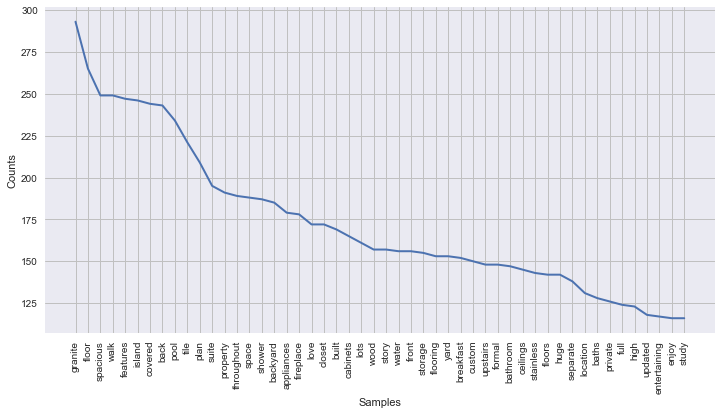

In [108]:
#Plot of common words in dataset
plt.figure(figsize=(12,6))
fdist.plot(50)

#### It shows that not many people has written the words about flood in their ads!! They have just avoided!

## Separating the rows that have written Flood on the description and analyzing the difference with those that has not written!

In [150]:
#Separating rows that contain flood description with those do not have!
df_wr_fl= df[df['description'].str.contains(("flood|flooded|flooding|FLOOD|FLOODING|FLOODED|Flood|Flooded|Flooding"))]
df_nwr_fl= df[~df['description'].str.contains(("flood|flooded|flooding|FLOOD|FLOODING|FLOODED|Flood|Flooded|Flooding"))]
df_wr_fl.describe() #Description of those that do have flood!

,price,estimate,type,year,park,lot,duration,pricesqft,save,score,relevance,result,flood,zipcode,bed,bath,Cut
count,6.800000e+01,6.800000e+01,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,3.882772e+05,3.585324e+05,3.0,2002.323529,0.867647,10180.555882,105.558824,125.882353,31.750000,0.255885,0.506185,0.941176,0.941176,77578.000000,3.676471,3.176471,2605.897059
std,3.177059e+05,1.954241e+05,0.0,12.250423,0.975895,7030.074987,130.040336,47.577911,54.051213,0.142122,0.140857,0.340428,0.237044,338.004063,0.781143,0.896780,4917.335215
min,1.420000e+05,1.480700e+05,3.0,1959.000000,0.000000,3920.000000,0.000000,64.000000,1.000000,-0.091741,0.152857,-1.000000,0.000000,75220.000000,2.000000,2.000000,0.000000
25%,2.687500e+05,2.671515e+05,3.0,1996.750000,0.000000,7132.000000,28.000000,98.750000,7.000000,0.165714,0.413179,1.000000,1.000000,77573.000000,3.000000,2.750000,0.000000
50%,3.004500e+05,3.057285e+05,3.0,2006.000000,1.000000,8184.000000,63.000000,113.000000,18.000000,0.251146,0.491028,1.000000,1.000000,77573.000000,4.000000,3.000000,0.000000
75%,3.811500e+05,3.842422e+05,3.0,2009.250000,2.000000,10506.000000,134.250000,132.000000,36.500000,0.375414,0.588674,1.000000,1.000000,77573.000000,4.000000,4.000000,5000.000000
max,2.495000e+06,1.311654e+06,3.0,2017.000000,3.000000,45302.400000,758.000000,377.000000,380.000000,0.675000,0.950000,1.000000,1.000000,78414.000000,6.000000,6.000000,22000.000000


In [154]:
df_nwr_fl.describe() #Description of those that do not have flood!

,price,estimate,type,year,park,lot,duration,pricesqft,save,score,relevance,result,flood,zipcode,bed,bath,Cut
count,9.770000e+02,9.770000e+02,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,4.668606e+05,4.009271e+05,3.062436,1982.141249,1.202661,10621.021494,70.338792,164.881269,47.027636,0.253925,0.499865,0.871034,0.407369,77362.401228,3.520983,2.904811,2902.314227
std,5.636416e+05,3.654750e+05,0.242070,30.059069,1.189896,13427.894798,142.758131,101.223591,74.433325,0.150177,0.134898,0.483064,0.491596,1317.304560,0.839484,1.248830,17385.022087
min,2.900000e+04,2.793300e+04,3.000000,1800.000000,0.000000,644.000000,0.000000,25.000000,1.000000,-0.085757,0.000000,-1.000000,0.000000,75203.000000,1.000000,1.000000,0.000000
25%,1.950000e+05,1.894410e+05,3.000000,1957.000000,0.000000,6573.000000,5.000000,105.000000,9.000000,0.172601,0.430000,1.000000,0.000000,75253.000000,3.000000,2.000000,0.000000
50%,2.998000e+05,2.963140e+05,3.000000,1986.000000,1.000000,7932.000000,23.000000,131.000000,22.000000,0.250893,0.505397,1.000000,0.000000,78209.000000,3.000000,3.000000,0.000000
75%,4.999000e+05,4.793050e+05,3.000000,2008.000000,2.000000,10454.000000,99.000000,205.000000,55.000000,0.340476,0.583893,1.000000,1.000000,78261.000000,4.000000,3.000000,0.000000
max,8.500000e+06,4.092411e+06,4.000000,2017.000000,10.000000,196020.000000,3231.000000,1167.000000,998.000000,0.890625,1.000000,1.000000,1.000000,78418.000000,10.000000,10.000000,448100.000000


### Results

#### Houses that have term "flood" in the description, are younger! (2002 vs 1982)
#### Houses that have term "flood" in the description, are cheaper! (380k vs 460k)
#### Houses that have term "flood" in the description, need more time to sell (duration)! (105 days vs 70 days)
#### Houses that have term "flood" in the description, have less price cut! ($2600 vs $2900)
#### Houses that have term "flood" in the description, have tried to write very good (sentiment analysis)! (0.94 vs 0.87)
#### People have saved less homes from houses that have written term "flool" in the description (31 vs 47)